In [1]:
from pathlib import Path
import time

import numpy as np
import pandas as pd
import SimpleITK as sitk
import matplotlib.pyplot as plt
import tensorflow as tf
import matplotlib.pyplot as plt
import h5py
from tqdm import tqdm

from src.models.fetch_data_from_hdf5 import get_tf_data
from src.models.train_model_2d import get_trainval_patient_list


In [2]:
h5_file = h5py.File(
        "/home/val/python_wkspce/plc_seg/data/processed/hdf5_2d/dataset.hdf5",
        "r")

In [3]:
path_clinical_info = "/home/val/python_wkspce/plc_seg/data/clinical_info.csv"
clinical_df = pd.read_csv(path_clinical_info).set_index("patient_id")

In [4]:
patient_list_train, patient_list_val, patient_list_test, df = get_trainval_patient_list(h5_file, clinical_df)

TypeError: get_trainval_patient_list() takes 1 positional argument but 2 were given

In [7]:
ds = get_tf_data(h5_file,
                clinical_df,
                output_shape_image=(256, 256, 3),
                random_slice=True,
                random_shift=0,
                n_repeat=10,
                num_parallel_calls='auto',
                oversample_plc_neg=True,
                return_plc_status=True,
                plc_ratio=0.5,
                )

In [8]:
plc_counter = 0
sample_counter = 0
for image, mask, plc_status in tqdm(ds.batch(4).take(1).as_numpy_iterator()):
    sample_counter += image.shape[0]
    plc_counter+=np.sum(plc_status)

1it [00:39, 39.10s/it]


In [9]:
plc_counter / sample_counter

0.25

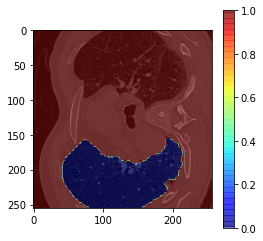

In [20]:
b=2
plt.figure(figsize=(4, 4))
plt.imshow(image[b,:,:,0],cmap='gray')
plt.imshow(mask[b, :,:,3], cmap='jet', alpha=0.5)
plt.colorbar()
plt.savefig("example_mask.png")